In [1]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [2]:
fname = "Learning about Humans learning ML.csv"
humans = pd.read_csv(fname)

humans.drop('Timestamp', axis=1, inplace=True)
humans['Education'] = (humans[
    'Years of post-secondary education (e.g. BA=4; Ph.D.=10)']
                       .str.replace(r'.*=','')
                       .astype(int))
humans.drop('Years of post-secondary education (e.g. BA=4; Ph.D.=10)', 
            axis=1, inplace=True)

In [4]:
humans.head()

,Favorite programming language,Favorite Monty Python movie,Years of Python experience,Have used Scikit-learn,Age,"In the Terminator franchise, did you root for the humans or the machines?",Which is the better game?,How successful has this tutorial been so far?,Education
0,Python,Monty Python's Life of Brian,20.0,Yep!,53,Skynet is a WINNER!,"Tic-tac-toe (Br. Eng. ""noughts and crosses"")",8,12
1,Python,Monty Python and the Holy Grail,4.0,Yep!,33,Team Humans!,Chess,9,5
2,Python,Monty Python and the Holy Grail,1.0,Yep!,31,Team Humans!,Chess,10,10
3,Python,Monty Python and the Holy Grail,12.0,Yep!,60,Team Humans!,"Tic-tac-toe (Br. Eng. ""noughts and crosses"")",6,10
4,Python,Monty Python's The Meaning of Life,7.0,Yep!,48,Team Humans!,Go,10,6


In [6]:
humans.describe(include = ['object', 'int', 'float'])

,Favorite programming language,Favorite Monty Python movie,Years of Python experience,Have used Scikit-learn,"In the Terminator franchise, did you root for the humans or the machines?",Which is the better game?,Education
count,116,116,116.000000,116,116,116,116.000000
unique,7,6,NaN,2,2,4,NaN
top,Python,Monty Python and the Holy Grail,NaN,Yep!,Team Humans!,Chess,NaN
freq,94,57,NaN,80,88,69,NaN
mean,NaN,NaN,4.195690,NaN,NaN,NaN,6.172414
std,NaN,NaN,5.136187,NaN,NaN,NaN,3.467303
min,NaN,NaN,0.000000,NaN,NaN,NaN,-10.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,4.000000
50%,NaN,NaN,3.000000,NaN,NaN,NaN,6.000000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,8.000000


## one hot encoding

In [8]:
humans_dumies = pd.get_dummies(humans)
list(humans_dumies.columns)

['Years of Python experience',
 'Age',
 'How successful has this tutorial been so far?',
 'Education',
 'Favorite programming language_C++',
 'Favorite programming language_JavaScript',
 'Favorite programming language_MATLAB',
 'Favorite programming language_Python',
 'Favorite programming language_R',
 'Favorite programming language_Scala',
 'Favorite programming language_Whitespace',
 'Favorite Monty Python movie_And Now for Something Completely Different',
 'Favorite Monty Python movie_Monty Python Live at the Hollywood Bowl',
 'Favorite Monty Python movie_Monty Python and the Holy Grail',
 "Favorite Monty Python movie_Monty Python's Life of Brian",
 "Favorite Monty Python movie_Monty Python's The Meaning of Life",
 'Favorite Monty Python movie_Time Bandits',
 'Have used Scikit-learn_Nope.',
 'Have used Scikit-learn_Yep!',
 'In the Terminator franchise, did you root for the humans or the machines?_Skynet is a WINNER!',
 'In the Terminator franchise, did you root for the humans or th

## choosing features and a target

In [11]:
X = humans_dumies.drop('How successful has this tutorial been so far?', axis=1)
y = humans_dumies['How successful has this tutorial been so far?']>8
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (116, 24)
y.shape: (116,)


In [12]:
y.head()

0    False
1     True
2     True
3    False
4     True
Name: How successful has this tutorial been so far?, dtype: bool

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)

Training features/target: (87, 24) (87,)
Testing features/target: (29, 24) (29,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

for n in range(1,20):
    tree = DecisionTreeClassifier(max_depth=n)
    tree.fit(X_train, y_train)
    print(n, tree.score(X_test, y_test))

1 0.7241379310344828
2 0.5862068965517241
3 0.7241379310344828
4 0.5172413793103449
5 0.6551724137931034
6 0.6551724137931034
7 0.5862068965517241
8 0.5862068965517241
9 0.6206896551724138
10 0.6206896551724138
11 0.5862068965517241
12 0.6206896551724138
13 0.6206896551724138
14 0.5862068965517241
15 0.6206896551724138
16 0.5862068965517241
17 0.6206896551724138
18 0.5862068965517241
19 0.5862068965517241


In [24]:
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7241379310344828

In [26]:
tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.5862068965517241

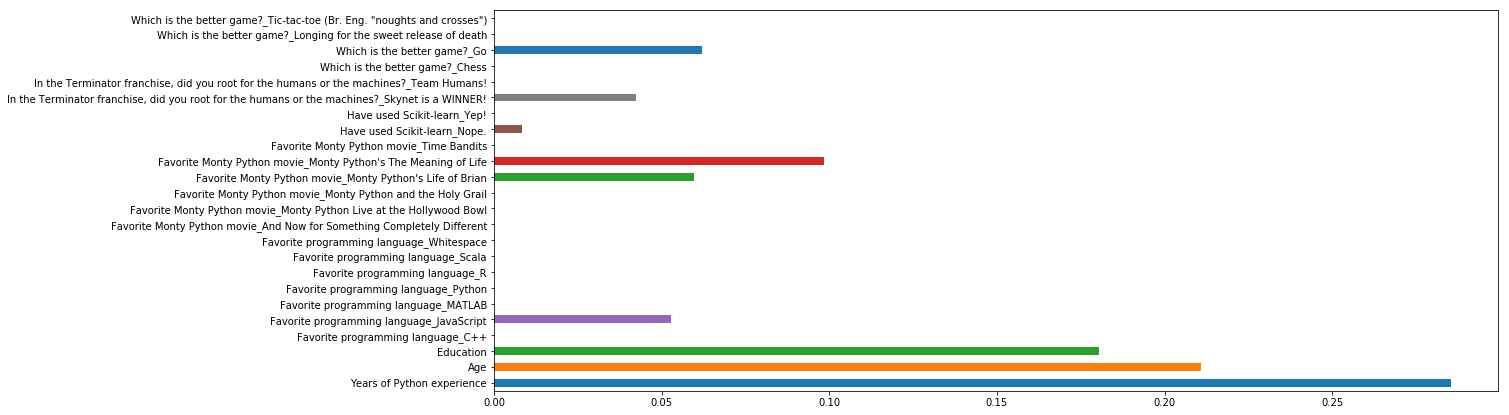

In [30]:
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

In [31]:
tree.score(X, y)

0.8879310344827587

In [35]:
from sklearn.tree import export_graphviz
import sys, subprocess
export_graphviz(tree, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([sys.prefix+'/bin/dot','-Tpng','ml-good.dot',
                       '-o','ml-good.png'])

FileNotFoundError: [WinError 2] 系统找不到指定的文件。